In [6]:
import pandas as pd
bikes = pd.read_pickle('https://github.com/rogovich/Data/blob/master/data/BikesDataVars.pkl?raw=true')

In [7]:
month_temp = bikes.groupby(bikes['Date'].dt.month)['Temperature'].mean()

In [8]:
import matplotlib.pyplot as plt

<BarContainer object of 12 artists>

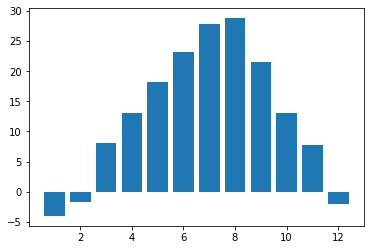

In [9]:
plt.bar(month_temp.index, month_temp)

<BarContainer object of 12 artists>

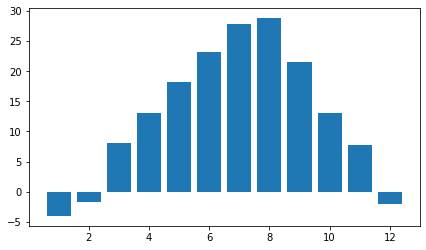

In [31]:
fig, ax = plt.subplots(figsize=(7, 4)) # figure, axes
ax.bar(month_temp.index, month_temp)

In [11]:
bikes_sum = bikes.groupby(bikes['Date'].dt.isocalendar().week)['Rental Count'].sum()

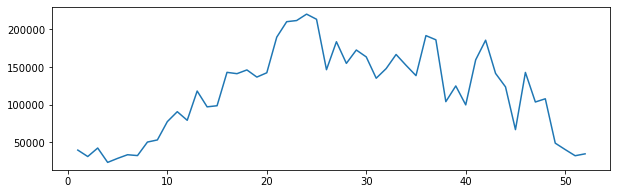

In [12]:
fig, ax = plt.subplots(figsize=(10, 3)) # figure, axis
ax.plot(bikes_sum.index, bikes_sum)

In [22]:
fig.savefig('my_plot.jpg', dpi=300)

In [24]:
seasons = bikes.groupby(['Seasons', 'Date'])['Rental Count'].sum()

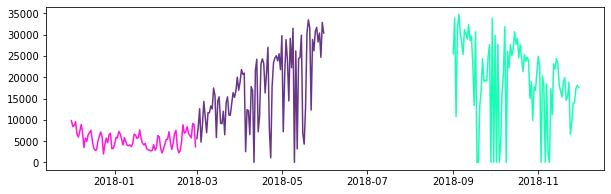

In [37]:
fig, ax = plt.subplots(figsize=(10, 3))
ax.plot(seasons['Autumn'], c='#17ffb6') # c - color
ax.plot(seasons['Winter'], c='#ff17dc')
ax.plot(seasons['Spring'], c='#673687')

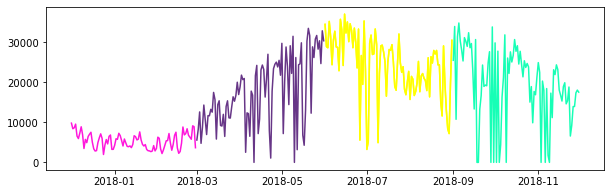

In [40]:
ax.plot(seasons['Summer'], c='yellow')
fig

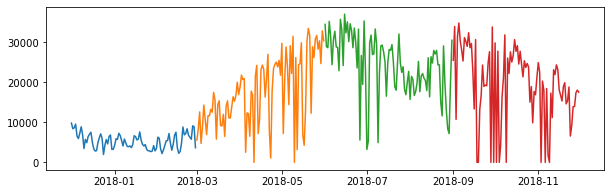

In [41]:
fig, ax = plt.subplots(figsize=(10, 3))
for season in ['Winter', 'Spring', 'Summer', 'Autumn']:
    ax.plot(bikes.groupby(['Seasons', 'Date'])['Rental Count'].sum()[season])

In [44]:
temperature = bikes.groupby(['Seasons', 'Date'])['Temperature'].mean()

In [83]:
for axis in ax.ravel():
    print(axis)

AxesSubplot(0.125,0.536818;0.352273x0.343182)
AxesSubplot(0.547727,0.536818;0.352273x0.343182)
AxesSubplot(0.125,0.125;0.352273x0.343182)
AxesSubplot(0.547727,0.125;0.352273x0.343182)


In [92]:
for season,axis in zip(bikes['Seasons'].unique(), ax.ravel()):
    print(season)
    print(axis)

Winter
AxesSubplot(0.125,0.536818;0.352273x0.343182)
Spring
AxesSubplot(0.547727,0.536818;0.352273x0.343182)
Summer
AxesSubplot(0.125,0.125;0.352273x0.343182)
Autumn
AxesSubplot(0.547727,0.125;0.352273x0.343182)


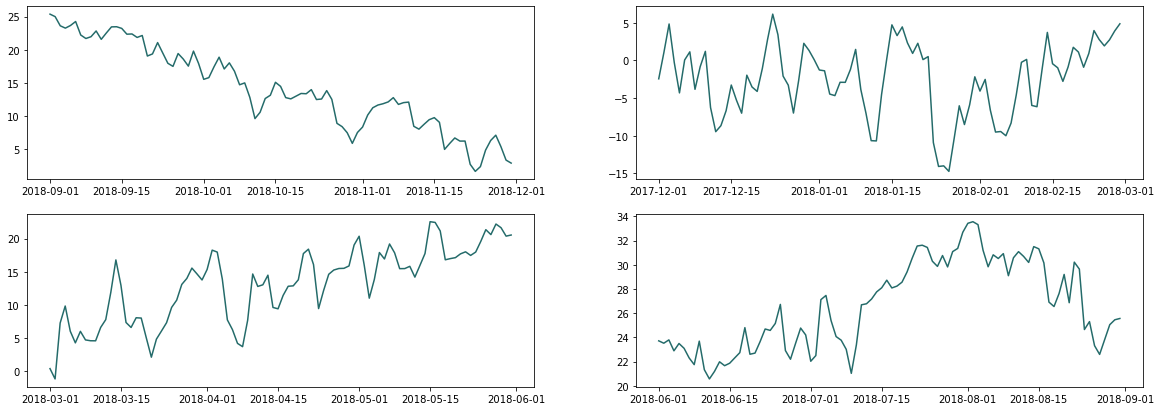

In [77]:
fig, ax = plt.subplots(2,2, figsize=(20,7))

ax[0][0].plot(temperature['Autumn'], c='#246b6a')
ax[0][1].plot(temperature['Winter'], c='#246b6a')
ax[1][0].plot(temperature['Spring'], c='#246b6a')
ax[1][1].plot(temperature['Summer'], c='#246b6a')

In [123]:
temp_mean = bikes['Temperature'].mean()

In [144]:
axis.spines

OrderedDict([('left', <matplotlib.spines.Spine at 0x7f86c9044280>),
             ('right', <matplotlib.spines.Spine at 0x7f86c9044370>),
             ('bottom', <matplotlib.spines.Spine at 0x7f86c9044460>),
             ('top', <matplotlib.spines.Spine at 0x7f86c9044550>)])

Text(0.5, 0.98, 'Daily temperature average by season')

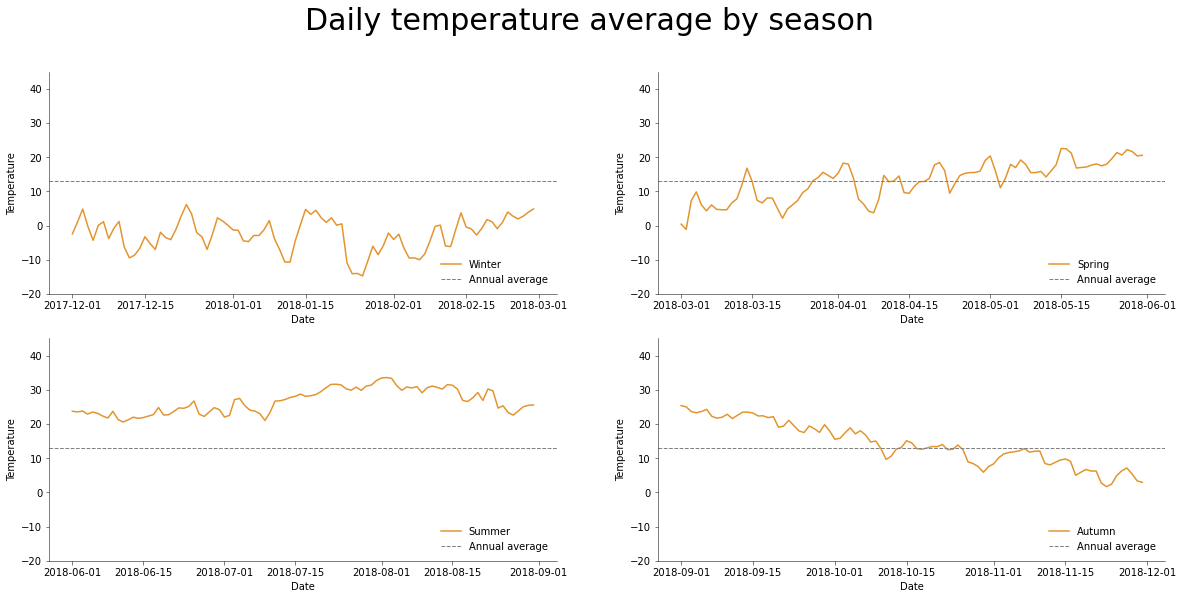

In [161]:
fig, ax = plt.subplots(2,2, figsize=(20,9))
for season,axis in zip(bikes['Seasons'].unique(), ax.ravel()):
    axis.plot(temperature[season], c='#e3942d')
    axis.set_ylim(-20, 45)
    axis.set_xlabel('Date')
    axis.set_ylabel('Temperature')
    axis.axhline(temp_mean, c='grey', ls='--', lw=1) # line style, line width
    axis.legend([season, 'Annual average'], frameon=False, loc=4)
    axis.spines['top'].set_visible(False)
    axis.spines['right'].set_visible(False)
    axis.spines['left'].set_lw(0.5)
    axis.spines['bottom'].set_linewidth(0.5)
    axis.xaxis.set_tick_params(width=0.5) # tick - засечка
    axis.yaxis.set_tick_params(width=0.5)

fig.suptitle('Daily temperature average by season', fontsize=30) # super title

In [164]:
fig.savefig('our_graph.png', dpi=300)

In [174]:
import numpy as np

X = np.array([[2,5,6], [4,5,6], [10,40,50]])
X

array([[ 2,  5,  6],
       [ 4,  5,  6],
       [10, 40, 50]])

In [171]:
for item in X:
    print(item)
    for item_2 in item:
        print(item_2)
    print('-'*10)

[2 5 6]
2
5
6
----------
[4 5 6]
4
5
6
----------


In [176]:
for item in X.ravel():
    print(item)

2
5
6
4
5
6
10
40
50


In [177]:
bikes

,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Rental Count,Normal Humidity,Temperature Category,Good weather
0,2017-12-01,0,-5.2,37,2.2,0.0,0.0,Winter,0,True,257,0,Freezing,0
1,2017-12-01,1,-5.5,38,0.8,0.0,0.0,Winter,0,True,219,0,Freezing,0
2,2017-12-01,2,-6.0,39,1.0,0.0,0.0,Winter,0,True,162,0,Freezing,0
3,2017-12-01,3,-6.2,40,0.9,0.0,0.0,Winter,0,True,148,1,Freezing,0
4,2017-12-01,4,-6.0,36,2.3,0.0,0.0,Winter,0,True,97,0,Freezing,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,19,4.2,34,2.6,0.0,0.0,Autumn,0,True,644,0,Chilly,0
8756,2018-11-30,20,3.4,37,2.3,0.0,0.0,Autumn,0,True,359,0,Chilly,0
8757,2018-11-30,21,2.6,39,0.3,0.0,0.0,Autumn,0,True,1236,0,Chilly,0
8758,2018-11-30,22,2.1,41,1.0,0.0,0.0,Autumn,0,True,628,1,Chilly,0


In [187]:
bool(False + 0)

False

In [191]:
bikes['Bank Holiday'] = np.where(bikes['Date'].dt.day_name().isin(['Saturday', 'Sunday']) 
                            + bikes['Holiday'], 1, 0)
bikes['Rainfall and Snowfall'] = bikes['Rainfall'] * 10 + bikes['Snowfall']

bikes_sum = bikes.groupby('Date')['Rental Count'].sum()
temp_av = bikes.groupby('Date')['Temperature'].mean()
rainsnow_av = bikes.groupby('Date')['Rainfall and Snowfall'].mean()
weekend = bikes.groupby('Date')['Bank Holiday'].max()

bikes_date = pd.concat([bikes_sum, temp_av, rainsnow_av, weekend], axis=1)

In [208]:
bikes_date.head(2)

,Rental Count,Temperature,Rainfall and Snowfall,Bank Holiday
Date,,,,
2017-12-01,9802,-2.454167,0.0,0
2017-12-02,8404,1.052174,0.0,1


Text(0, 0.5, 'Арендованные велосипеды')

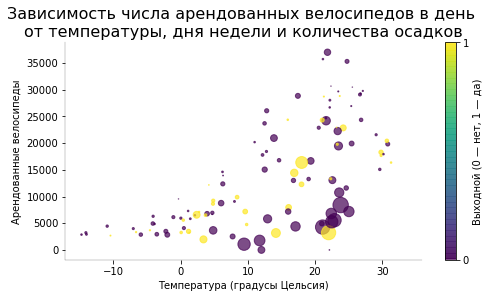

In [236]:
fig, ax = plt.subplots(figsize=(8,4))
graph = ax.scatter(bikes_date['Temperature'], bikes_date['Rental Count'],
          c=bikes_date['Bank Holiday'], s=bikes_date['Rainfall and Snowfall']*6,
          alpha=0.7)
plt.colorbar(graph, label = 'Выходной (0 — нет, 1 — да)', ticks=[0,1])

ax.set_title('Зависимость числа арендованных велосипедов в день \nот температуры, дня недели и количества осадков', fontsize=16)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_linewidth(0.2)
ax.spines['bottom'].set_linewidth(0.2)
ax.set_xlabel('Температура (градусы Цельсия)', fontsize=10)
ax.set_ylabel('Арендованные велосипеды', fontsize=10)

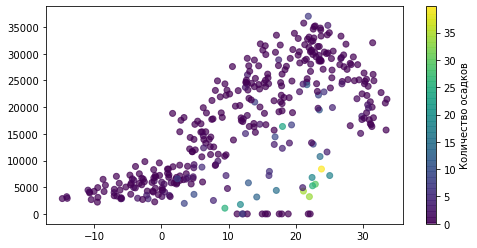

In [231]:
fig, ax = plt.subplots(figsize=(8,4))
graph = ax.scatter(bikes_date['Temperature'], bikes_date['Rental Count'],
          c=bikes_date['Rainfall and Snowfall'],
          alpha=0.7)
plt.colorbar(graph, label = 'Количество осадков')

In [257]:
gapminder = pd.read_csv('https://raw.githubusercontent.com/rogovich/Data/master/data/gapminderData.csv')
gapminder['continent'] = pd.Categorical(gapminder['continent'])


,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106


Text(0.5, 1.0, 'Зависимость средней продолжительности жизни\n от ВВП на душу населения. Год: 1952')

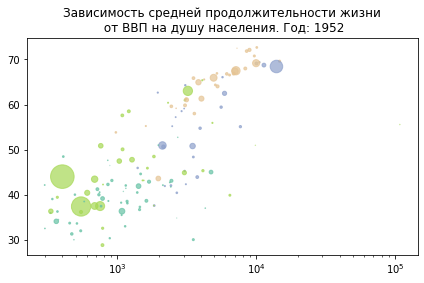

In [269]:
gapminder = pd.read_csv('https://raw.githubusercontent.com/rogovich/Data/master/data/gapminderData.csv')
gapminder['continent'] = pd.Categorical(gapminder['continent'])

fig, ax = plt.subplots(figsize=(7, 4))
year = 1952
gapminder_year = gapminder[gapminder['year'] == year]
ax.scatter(gapminder_year['gdpPercap'], gapminder_year['lifeExp'],
          s=gapminder_year['pop'] / 1000000, alpha=0.7,
          c=gapminder_year['continent'].cat.codes,
          cmap='Set2') # color map
ax.set_xscale('log')
ax.set_title(f'Зависимость средней продолжительности жизни\n от ВВП на душу населения. Год: {year}')
